In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use("dark_background")

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix, f1_score, accuracy_score, recall_score, classification_report

In [2]:
label_dic = {1: 'Still', 2: 'Walking', 3: 'Run', 4: 'Bike', 5: 'Car', 6: 'Bus', 7: 'Train', 8: 'Subway'}

In [3]:
df = pd.read_csv("data/mid_res/data_df_full.csv").fillna(0)
col_drop_x = ['time', 'label']

In [9]:
col_drop = ['latitude',
 'longitude',
 'altitude',
 'time_dlt',
 'valid_dlt',
 'east',
 'north',
 'east_dlt',
 'north_dlt',
 'east_speed',
 'north_speed',
 'cells_ctype_mode'
 ]

In [10]:
# list(df.drop(col_drop, axis = 1))

In [11]:
train_ratio = 0.8
X = df.drop(col_drop_x + col_drop, axis = 1).fillna(0)

In [12]:
# sequence
len_train = int(X.shape[0] * train_ratio)
len_test = X.shape[0] - len_train
X_train, X_test, y_train, y_test = X.iloc[:len_train,:], X.iloc[-len_test:,:], df['label'][:len_train], df['label'][-len_test:]
# random split
# X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size = train_ratio)

In [13]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 0, max_depth = 8)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=0)

In [70]:
# decision_function_shape='ovo' 设置策略
# svc = svm.SVC(max_iter = 1000)
# svc.fit(X_train, y_train)

In [14]:
tmp_df = df[['num_wifi', 'label']]
tmp_df['is_wifi'] = tmp_df.apply(lambda x: 1 if x['num_wifi'] > 0 else 0, axis = 1)
tmp_df['is_subway'] = tmp_df.apply(lambda x: 1 if x['label'] == 8 else 0, axis = 1)

In [99]:
confusion_matrix(tmp_df.is_wifi, tmp_df.is_subway)

array([[294120,  17794],
       [567224, 101389]])

In [103]:
Counter(tmp_df['is_wifi'])

Counter({1: 668613, 0: 311914})

In [97]:
precision_score(tmp_df.is_wifi, tmp_df.is_subway)

0.8507001837510383

In [102]:
101389/(567224+101389)

0.15164078472898374

In [101]:
101389/(17794+101389)

0.8507001837510383

In [71]:
pred_rf = rf.predict(X_test)
# pred_svc = svc.fit(X_test)

## Evaluation

In [72]:
pred = pred_rf
print("macro score: {}\nmicro score: {}\nweighted score: {}".format(precision_score(y_test, pred, average = "macro"),
                                                                    precision_score(y_test, pred, average = "micro"),
                                                                    precision_score(y_test, pred, average = "weighted")))
conf = confusion_matrix(y_test, pred)
conf

macro score: 0.5505395912414015
micro score: 0.5547306048769542
weighted score: 0.57843441822158


array([[13884,   775,     7,   205,  1073,  5560,  7062,  1774],
       [ 1974, 20951,   711,   659,    58,  2346,   329,  1337],
       [   52,  4307,  2624,  2168,     1,   674,     3,    11],
       [  771,  3126,  2145, 22630,   798,  3420,    41,    24],
       [ 1115,  1249,   259,  5691, 17573,  6811,  3676,  1059],
       [  412,   238,    31,  1889,  5092, 13609,  2405,   118],
       [  585,    80,     0,   650,  5156,  4442, 11043,  2332],
       [  163,     3,     0,     3,   267,  1184,   999,  6472]])

In [15]:
pred_prob_rf = rf.predict_proba(X_test)
pred_prob = pred_prob_rf

In [16]:
df1 = pd.DataFrame(pred_prob_rf, columns = list(label_dic.values()))
df2 = pd.DataFrame({"label": y_test})
y_test_compare = pd.concat([df1.reset_index(drop = True), df2.reset_index(drop = True)], axis = 1, ignore_index = False)
# y_test_compare.to_csv('data/mid_res/y_test_compare.csv', header = True, index = False)
# pd.set_option('200', None)
# y_test_compare

In [19]:
# t1 = df1.apply(lambda x: np.where(x == top(x, n = 2)[1])[0][0], axis = 1)
# t2 = df1.apply(lambda x: np.where(x == top(x, n = 2)[0])[0][0], axis = 1)

In [ ]:
t1

In [ ]:
tmp_df = pd.concat([df1.reset_index(drop = True), df2.reset_index(drop = True)], axis = 1, ignore_index = False)
tmp_df['pred_top1'] = t1 
tmp_df['pred_top2'] = t2
tmp_df['pred'] = tmp_df.apply(lambda x: x['pred_top1'])

In [185]:
def top(lst, n = 5):
    return pd.Series(lst).sort_values().to_list()[-n:]
    
df1['pred_top1'] = df1.apply(lambda x: np.where(x == top(x, n = 2)[1])[0][0], axis = 1)
df1['pred_top2'] = df1.apply(lambda x: np.where(x == top(x, n = 2)[0])[0][0], axis = 1)

In [20]:
# df1.iloc[:200,:]

In [107]:
accuracy_score(y_test, pred)

0.5547306048769542

In [110]:
recall_score(y_test, pred, average = 'micro')

0.5547306048769542

In [88]:
f1_score(y_test, pred, average='macro')

0.5340397472365046

In [23]:
# plt.figure(figsize = [12, 8])
# plt.scatter(range(len(pred)), pred, alpha = 0.3)

In [24]:
# plt.figure(figsize = [12, 8])
# plt.scatter(range(len(y_test)), y_test, alpha = 0.3)

row: true value  
column: pred value

<AxesSubplot:>

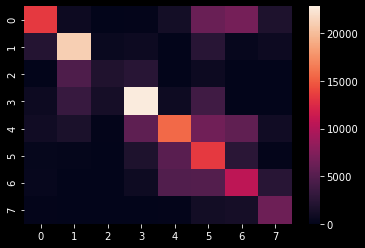

In [61]:
sn.heatmap(conf)

In [112]:
print(classification_report(y_test, pred, target_names = list(label_dic.values())))

              precision    recall  f1-score   support

       Still       0.73      0.46      0.56     30340
     Walking       0.68      0.74      0.71     28365
         Run       0.45      0.27      0.34      9840
        Bike       0.67      0.69      0.68     32955
         Car       0.59      0.47      0.52     37433
         Bus       0.36      0.57      0.44     23794
       Train       0.43      0.45      0.44     24288
      Subway       0.49      0.71      0.58      9091

    accuracy                           0.55    196106
   macro avg       0.55      0.54      0.53    196106
weighted avg       0.58      0.55      0.56    196106



In [62]:
label_dic

{1: 'Still',
 2: 'Walking',
 3: 'Run',
 4: 'Bike',
 5: 'Car',
 6: 'Bus',
 7: 'Train',
 8: 'Subway'}

In [17]:
len(list(df.drop(['time', 'label'], axis = 1).columns))

40

In [25]:
plt.figure(figsize = [12, 8])
plt.plot(rf.feature_importances_)
plt.xticks(range(len(list(df.drop(['time', 'label'], axis = 1).columns))), list(df.drop(['time', 'label'], axis = 1).columns), rotation = 90);

In [29]:
rf.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state

In [30]:
list(np.unique(df['label']))

[1, 2, 3, 4, 6, 7, 8]

In [32]:
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# 导出为dot 文件
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(df.drop(['time', 'label'], axis = 1).columns),
                class_names = [label_dic[int(i)] for i in list(np.unique(df['label']))],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [33]:
from sklearn import tree

In [34]:
dot_data = tree.export_graphviz(estimator,
                                feature_names=list(df.drop(['time', 'label'], axis = 1).columns),
                                out_file=None,
                                filled=True,
                                rounded=True)

In [41]:
import pydotplus
import collections
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

In [43]:
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# graph.write_png('tree.png')

In [22]:
# graph.write_png('tree.png')

In [21]:
# tree.plot_tree(estimator);

In [41]:
rf.n_features_

28

In [42]:
rf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1491434855)]

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(rf.estimators_[0], out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [44]:
list(X_train.columns)

['label',
 'accuracy',
 'num_gps',
 'num_wifi',
 'num_cells',
 'speed',
 'wifi_rssi_mode',
 'wifi_rssi_mean',
 'wifi_rssi_min',
 'wifi_rssi_max',
 'wifi_rssi_std',
 'cells_isRegistered_mean',
 'cells_asuLevel_mean',
 'cells_dbm_mean',
 'cells_level_mean',
 'cells_asuLevel_min',
 'cells_dbm_min',
 'cells_level_min',
 'cells_asuLevel_max',
 'cells_dbm_max',
 'cells_level_max',
 'cells_asuLevel_std',
 'cells_dbm_std',
 'gps_snr',
 'gps_snr_mean',
 'gps_snr_min',
 'gps_snr_max',
 'gps_snr_std']